# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, SpectralClustering, DBSCAN, Birch, OPTICS, AffinityPropagation, MeanShift
from yellowbrick.cluster import KElbowVisualizer

# Custom functions

In [3]:
def save_dataset(nome_file, file):
    with open(nome_file +'.pkl', 'wb') as f:
        pickle.dump(file, f)
    return

# Load Dataset

In [4]:
with open('wine_dataset.pkl', 'rb') as f:
    X = pickle.load(f)

In [5]:
with open('wine_df.pkl', 'rb') as f:
    df = pickle.load(f)

# Elbow method for Clustering

In [15]:
algorithms = [KMeans(), MiniBatchKMeans(), AgglomerativeClustering(), SpectralClustering(), Birch()]

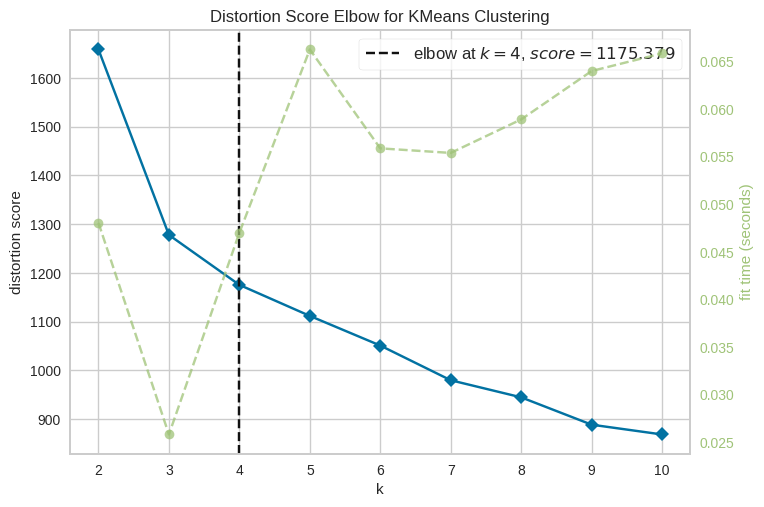

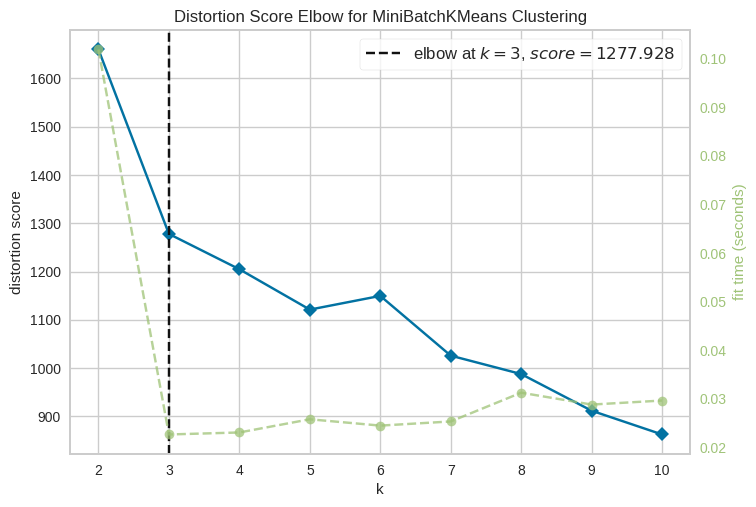

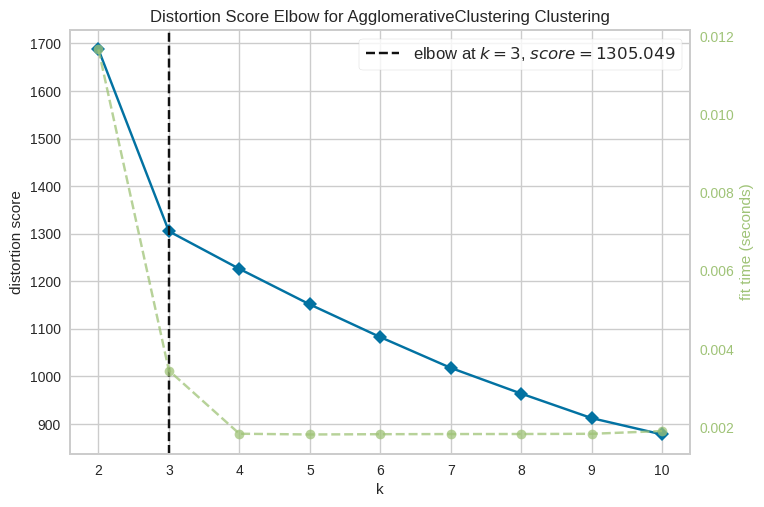

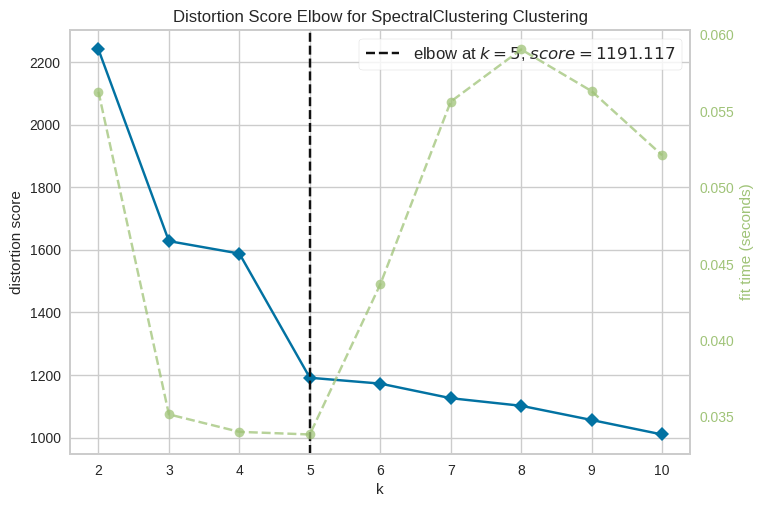

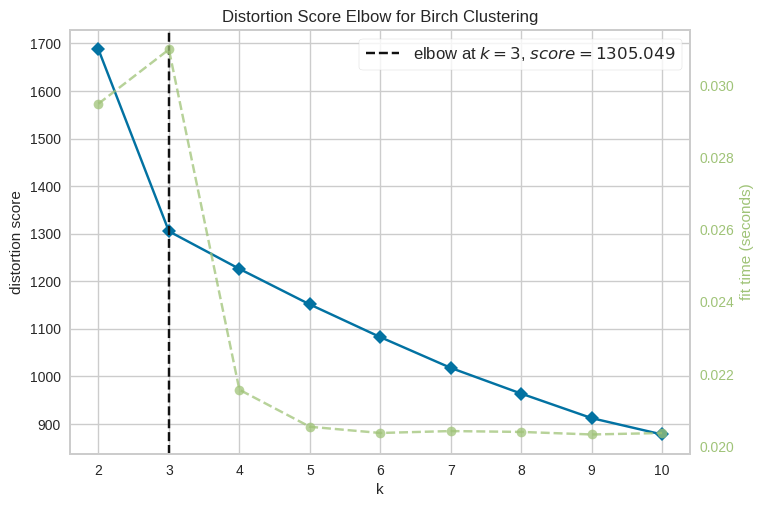

In [7]:
for algorithm in algorithms:
    model = KElbowVisualizer(algorithm)
    model.fit(X)
    model.show()

# Add target to dataframe and save

In [8]:
k = 3

In [9]:
kmeans = KMeans(n_clusters=k)

In [10]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [11]:
y = kmeans.predict(X)

In [12]:
df_with_target = pd.concat([df, pd.Series(y, name='target')], axis=1)

In [13]:
df_with_target.sample(10)

,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline,target
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0,0
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0,1
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0,1
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0,0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,0
37,13.05,1.65,2.55,18.0,98.0,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105.0,1
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0,2
72,13.49,1.66,2.24,24.0,87.0,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472.0,2
170,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510.0,0
39,14.22,3.99,2.51,13.2,128.0,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760.0,1


In [14]:
save_dataset('dataframe_with_target', df_with_target)